In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, acyaccur_score
import copy
np.random.seed(42)

In [97]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400
    N = int(m/2)
    D = 2
    X = np.zeros((m,D))
    Y = np.zeros((m,1), dtype='uint8')
    a = 4

    for j in range(2):
        ix = range(N*j, N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2
        r = a*np.sin(4*t)+np.random.randn(N)*0.2
        X[ix]=np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix]=j

    X = X.T
    Y = Y.T

    return X, Y

In [98]:
X, Y = load_planar_dataset()

In [99]:
X

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0

In [100]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

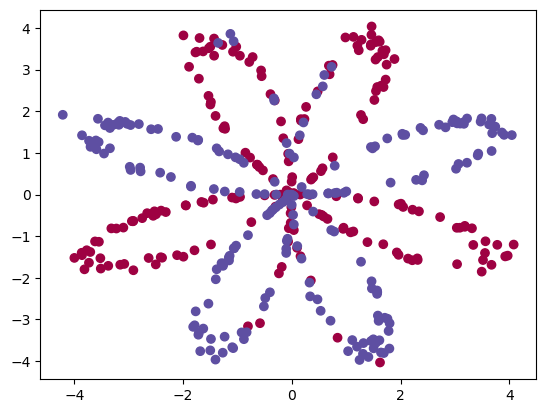

In [101]:
plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral)

In [102]:
n=X.shape[0]
m=X.shape[1]
print(f"n={n}")
print(f"m={m}")

n=2
m=400


In [103]:
clf = LogisticRegression()
clf.fit(X.T, Y.T)

c:\Users\Scotty\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [104]:
clf.score(X=X.T, y=Y.T)

0.47

In [105]:
Y_pred = clf.predict(X.T)

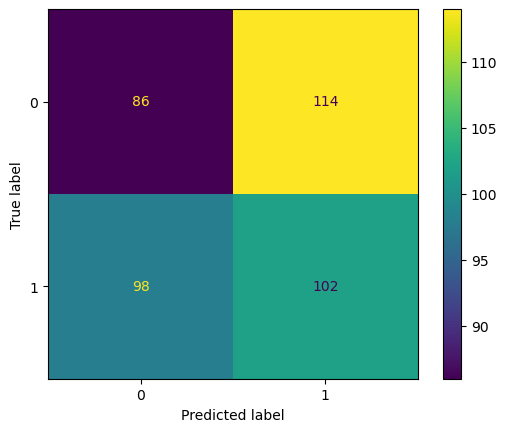

In [106]:
cm = confusion_matrix(y_true=Y.T, y_pred=Y_pred.T)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [107]:
def layer_sizes(X,Y,h):
    n = X.shape[0]
    k = Y.shape[0]
    return n, h, k

In [108]:
def initialize_parameters(n,h,k):
    W1 = np.random.randn(n, h)*0.01
    b1 = np.zeros((h, 1))
    W2 = np.random.randn(h,k)*0.01
    b2 = np.zeros((k, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [109]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [110]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    A0=X
    Z1 = np.matmul(W1.T,A0)+b1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2.T,A1)+b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    neurons = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, neurons
    

In [111]:
def compute_cost(A2,Y):
    m=Y.shape[1]

    cost = -1/m*(np.matmul(Y,np.log(A2).T) + np.matmul((1-Y), np.log(1-A2).T))

    cost = float(np.squeeze(cost))

    return cost

In [112]:
def backward_propagation(parameters, neurons, X, Y):
    m = X.shape[1]
    A0 = X
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = neurons["A1"]
    A2 = neurons["A2"]

    dJdZ2 = A2-Y
    dJdW2 = 1/m*np.matmul(A1, dJdZ2.T)
    dJdb2 = dJdZ2.mean(axis=1, keepdims=True)
    dJdZ1 = np.multiply(np.matmul(W2, dJdZ2), (1 - np.power(A1, 2)))
    dJdW1 = 1/m*np.matmul(A0, dJdZ1.T)
    dJdb1 = dJdZ1.mean(axis=1, keepdims=True)

    grads={"dJdW1": dJdW1, "dJdb1": dJdb1, "dJdW2": dJdW2, "dJdb2": dJdb2}

    return grads

In [113]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]

    dJdW1 = grads["dJdW1"]
    dJdb1 = grads["dJdb1"]
    dJdW2 = grads["dJdW2"]
    dJdb2 = grads["dJdb2"]

    W1 = W1 - learning_rate*dJdW1
    b1 = b1 - learning_rate*dJdb1
    W2 = W2 - learning_rate*dJdW2
    b2 = b2 - learning_rate*dJdb2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters


In [117]:
def nn_model(X,Y,h,num_iterations=10000, print_cost=False):
    n, h, k = layer_sizes(X,Y,h)
    parameters = initialize_parameters(n,h,k)

    for i in range(num_iterations):
        A2, neurons = forward_propagation(X, parameters)
        cost = compute_cost(A2,Y)
        grads = backward_propagation(
            parameters, neurons,X,Y)
        parameters=update_parameters(parameters,grads)

        if print_cost and i%1000==0:
            print(f"Cost after iteration {i,cost}")

    return parameters

In [115]:
def predict(parameters, X):
    A2, neurons = forward_propagation(X,parameters)
    predictions = np.where(A2 > 0.5, 1, 0)
    return predictions

In [118]:
parameters = nn_model(X,Y,h=4,num_iterations=10000,print_cost=True)

Cost after iteration (0, 0.693154709825669)
Cost after iteration (1000, 0.2821564247116164)
Cost after iteration (2000, 0.26952659754876374)
Cost after iteration (3000, 0.2621016728142721)
Cost after iteration (4000, 0.23834670604718533)
Cost after iteration (5000, 0.22572181164344735)
Cost after iteration (6000, 0.22147920994596526)
Cost after iteration (7000, 0.21880847795471603)
Cost after iteration (8000, 0.21680551432388007)
Cost after iteration (9000, 0.2151938687897304)


In [121]:
predictions = predict(parameters, X)

In [122]:
accuracy_score(
    y_true=Y.reshape(-1),
    y_pred=predictions.reshape(-1)
)

0.9075

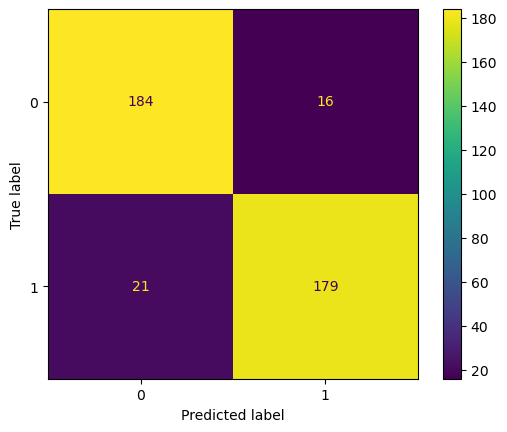

In [123]:
cm = confusion_matrix(
    y_true=Y.reshape(-1), y_pred=predictions.reshape(-1))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()